In [0]:
import pandas as pd
import numpy as np
import os
from google.colab import drive
from google.colab import files
import regex as re
from google.colab import drive
drive.mount('/content/drive')
from scipy import stats
pd.options.mode.chained_assignment = None
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
os.chdir('/content/drive/My Drive/DBA3803')
os.getcwd()

'/content/drive/My Drive/DBA3803'

In [0]:
import io
df2 = pd.read_csv('train.csv') #change the filename here

### **Creating a fake dataset of 5 comments and sample features to show how the model should work and look like**

In [0]:

example = df2.iloc[0:5,:]
example['Comments'][0] = ':) this is a null statement.'
example['Comments'][1] = 'PAP needs to GOOOOO'
example['Comments'][2] = 'We are so excited to be here'
example['Comments'][3] = 'WHY DOES THIS ALWAYS HAPPEN TO ME!'
example['Comments'][4] = 'van ching and ji hwee'
example

,Comments,Insulting,Anti Government,Xenophobic,Racist,Sexual
0,:) this is a null statement.,1,0,1,0,0
1,PAP needs to GOOOOO,0,0,0,0,0
2,We are so excited to be here,1,0,0,0,0
3,WHY DOES THIS ALWAYS HAPPEN TO ME!,1,1,0,0,0
4,van ching and ji hwee,1,1,0,0,0


In [0]:
#adding features to the sample dataset

example['capitals'] = example['Comments'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
example['num_exclamation_marks'] = example['Comments'].apply(lambda comment: comment.count('!'))

### I create a point biserial coefficient matrix and a pvalue matrix to store all the correlation values computed from doing Point Biserial Coefficient between each feature and each label

In [0]:
PointBiserialCoefficientMatrix = df2.iloc[0:0,1:5]
PValuesMatrixStored = df2.iloc[0:0, 1:5]
PointBiserialCoefficientMatrix
PValuesMatrixStored

,Insulting,Anti Government,Xenophobic,Racist


### This is where we actually start computing correlation. The pearson's method doesn't work, or at least is inaccurate

### Pearson Coefficient way to measure correlation. This is the standard way to measure correlation between 2 continuous variables

In [0]:
features = ('capitals', 'num_exclamation_marks')
columns = ('Insulting', 'Anti Government', 'Xenophobic', 'Racist', 'Sexual')

rows = [{c:example[f].corr(example[c], method='pearson') for c in columns} for f in features]


### However, our data is of continuous (how many capitals) against binary (whether or not it is insulting, 1 or 0)
### To compute correlation between continuous and binary, we instead use a point-biserial correlation, which is essentially derived from the Pearson coefficient

In [0]:
for c in columns:
  for f in features: 
    a,r = stats.pointbiserialr(example[c], example[f])
    if (r < 0.05):
      PointBiserialCoefficientMatrix.loc[f,c] = a
      PValuesMatrixStored.loc[f,c] = r
    else:
      PointBiserialCoefficientMatrix.loc[f,c] = 0
      PValuesMatrixStored.loc[f,c] = r
        
    


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


###The output below shows the correlation (ranging from -1 to +1), read the same way as you would for any correlation. +1 means strong positive correlation, -1 means negative.
###With a p-value <0.05 meaning significant

In [0]:
PointBiserialCoefficientMatrix

,Insulting,Anti Government,Xenophobic,Racist,Sexual
capitals,0.0,0.0,0.0,0.0,0.0
num_exclamation_marks,0.0,0.0,0.0,0.0,0.0


In [0]:
PValuesMatrixStored

,Insulting,Anti Government,Xenophobic,Racist,Sexual
capitals,0.901829,0.412632,0.555351,1.0,1.0
num_exclamation_marks,0.685038,0.272228,0.685038,1.0,1.0


###Everything below here is when the modelling really starts.

###First step is the preprocessing, changing comments to as.type(str) for all comments. Because for some reason, one of the comment is just simply a numpy.float object instead of str.

###Then we handcraft the 23 features, with each feature being the count of the particular word.

In [0]:
df2 = pd.read_csv('train.csv') #change the filename here
df2[['Comments']] = df2[['Comments']].astype(str) #For some reason some of the comment is of type float, change all comments to string first 

df2['atb'] = df2['Comments'].apply(lambda comment: comment.lower().count('atb'))
df2['bbfa'] = df2['Comments'].apply(lambda comment: comment.lower().count('bbfa'))
df2['amdk'] = df2['Comments'].apply(lambda comment: comment.lower().count('amdk'))
df2['nnp'] = df2['Comments'].apply(lambda comment: comment.lower().count('nnp'))
df2['chiobu'] = df2['Comments'].apply(lambda comment: comment.lower().count('chiobu'))
df2['sinkies'] = df2['Comments'].apply(lambda comment: comment.lower().count('sinkies'))
df2['cunt'] = df2['Comments'].apply(lambda comment: comment.lower().count('cunt'))
df2['cpf'] = df2['Comments'].apply(lambda comment: comment.lower().count('cpf'))
df2['prc'] = df2['Comments'].apply(lambda comment: comment.lower().count('prc'))
df2['pap'] = df2['Comments'].apply(lambda comment: comment.lower().count('pap'))
df2['pappies'] = df2['Comments'].apply(lambda comment: comment.lower().count('pappies'))
df2['ang mo'] = df2['Comments'].apply(lambda comment: comment.lower().count('ang mo'))
df2['dog'] = df2['Comments'].apply(lambda comment: len(re.findall('(?=dog)', comment.lower())))
df2['knn'] = df2['Comments'].apply(lambda comment: len(re.findall('(?=knn)', comment.lower())))
df2['cb'] = df2['Comments'].apply(lambda comment: len(re.findall('(?=cb)', comment.lower())))
df2['fuck'] = df2['Comments'].apply(lambda comment: len(re.findall('(?=fuck)', comment.lower())))
df2['fk'] = df2['Comments'].apply(lambda comment: len(re.findall('(?=fk)', comment.lower())))
df2['pussy'] = df2['Comments'].apply(lambda comment: len(re.findall('(?=pussy)', comment.lower())))
df2['boobs'] = df2['Comments'].apply(lambda comment: len(re.findall('(?=boobs)', comment.lower())))
df2['xmm'] = df2['Comments'].apply(lambda comment: len(re.findall('(?=xmm)', comment.lower())))
df2['fark'] = df2['Comments'].apply(lambda comment: len(re.findall('(?=fark)', comment.lower())))
df2['ah neh'] = df2['Comments'].apply(lambda comment: len(re.findall('(?=ah neh)', comment.lower())))
df2['oppies'] = df2['Comments'].apply(lambda comment: len(re.findall('(?=oppies)', comment.lower())))


###Sample of what the training data now looks like.

###Note: the cell value of 3 in the first comment under the 'knn' feature is because the comment contains 3 counts of the word 'knn'.

In [0]:
df2.iloc[1570:1575,]

,Comments,Insulting,Anti Government,Xenophobic,Racist,Sexual,atb,bbfa,amdk,nnp,...,knn,cb,fuck,fk,pussy,boobs,xmm,fark,ah neh,oppies
1570,KNN some uncle riding motorised wheel chair an...,1,0,0,0,0,0,0,0,0,...,3,0,0,0,0,0,0,0,0,0
1571,Sinkies going crazy Both loony deserves each o...,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1572,This type of old fucks are hot air only. Chall...,1,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
1573,The old man has every right to enjoy his music...,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1574,Wah what a threat.,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###We then create the Point Biserial Coefficient Matrix and the P Value Matrix again, to get ready to store all the correlation values and p values which we are about to start testing.





In [0]:
PointBiserialCoefficientMatrix = df2.iloc[0:0,1:5]
PValuesMatrixStored = df2.iloc[0:0, 1:5]

In [0]:
PointBiserialCoefficientMatrix

,Insulting,Anti Government,Xenophobic,Racist


In [0]:
PValuesMatrixStored

,Insulting,Anti Government,Xenophobic,Racist


###Before that, just a quick summary of the total counts across the entire training dataset and what exactly are the features that we will be using.

In [0]:
TotalCount = df2.iloc[:,6:30]
TotalCount = TotalCount.sum(axis = 0, skipna = True) 
print(TotalCount)

atb        104
bbfa        46
amdk        67
nnp         27
chiobu      47
sinkies     87
cunt        28
cpf         43
prc         21
pap        282
pappies     16
ang mo      32
dog         79
knn        390
cb         165
fuck       187
fk          23
pussy       19
boobs       44
xmm         40
fark        49
ah neh      19
oppies      16
dtype: int64


###The magic begins here. For each label, for each feature, compute the correlation using stats.pointbiserialr().

###(a,r) is essentially the (output, pvalue) of the computation.

###We store all the a in the Point Biserial Coefficient Matrix.

###We store all the r in the P Value Matrix.





In [1]:
features = ('atb', 'bbfa', 'amdk', 'nnp', 'chiobu', 'sinkies', 'cunt', 'cpf', 'prc', 'pap','pappies','ang mo','dog','knn','cb','fuck','fk','pussy','boobs','xmm','fark','ah neh', 'oppies')
columns = ('Insulting', 'Anti Government', 'Xenophobic', 'Racist', 'Sexual')

####################################################################################
##ANALYZING THE TRAINING SET FOR REAL TO OUTPUT SIGNIFICANT CORRELATIONS MATRICES ##
####################################################################################

for c in columns:
  for f in features: 
    a,r = stats.pointbiserialr(df2[c], df2[f]) # the output of (a,r) here refers to (corr value, p-value)
    if (r < 0.05 and a > 0.01): #if [p-value is significant] && corr is positive cause I only want to care about features that leads indication of the categories
      PointBiserialCoefficientMatrix.loc[f,c] = a #then append the corr value inside the PointBiserialCoefficient matrix
      PValuesMatrixStored.loc[f,c] = r 
    else:
      PointBiserialCoefficientMatrix.loc[f,c] = 0 #if pvalue not significant , the corr value will be 0
      PValuesMatrixStored.loc[f,c] = r



NameError: ignored

###This is manual proof of the correlation computed. Using the equation of


###Correlation = (MeanOfAllPositiveBinaries - MeanOfAllNegativeBinaries)/StddevOfEntireFeature x
###sqrt(ProportionOfPositives * ProportionOfNegatives)

In [0]:
c,d = stats.pointbiserialr(df2['Insulting'], df2['knn'])

M1 = np.average(df2[df2['Insulting'] == 1]['knn'])
M2 = np.average(df2[df2['Insulting'] == 0]['knn'])
diff = M1 - M2
stddev = np.std(df2['knn'])
P = len(df2[df2['Insulting'] == 1])/len(df2['knn'])
Q = len(df2[df2['Insulting'] == 0])/len(df2['knn'])

correlationValueBetweenInsultingAndKnn = (diff/stddev) * np.sqrt(P*Q)
print('Calculated correlation value: ' + str(correlationValueBetweenInsultingAndKnn))
print('Correlation value from stats.pointbiserialr: ' + str(c))

Calculated correlation value: 0.2027117782466135
Correlation value from stats.pointbiserialr: 0.20271177824662884


In [0]:
PointBiserialCoefficientMatrix

,Insulting,Anti Government,Xenophobic,Racist,Sexual
atb,0.072640,0.000000,0.180260,0.073172,0.059406
bbfa,0.023500,0.000000,0.020208,0.000000,0.000000
amdk,0.064862,0.000000,0.000000,0.169275,0.039963
nnp,0.047777,0.000000,0.000000,0.000000,0.100029
chiobu,0.016879,0.000000,0.019456,0.000000,0.080712
sinkies,0.105564,0.048368,0.070204,0.022562,0.000000
cunt,0.055034,0.000000,0.015603,0.000000,0.045327
cpf,0.022761,0.050745,0.000000,0.000000,0.000000
prc,0.031182,0.000000,0.143816,0.042170,0.000000
pap,0.090002,0.254674,0.044424,0.023839,0.000000


###Significant p values are then highlighted in blue, for easier visual identification on the significant values.

In [0]:
def color_significants_blue(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for significant
    strings, black otherwise.
    """
    color = 'blue' if val < 0.05 else 'black'
    return 'color: %s' % color

  
#apply red color to significant values
PValuesMatrixStored = PValuesMatrixStored.style.applymap(color_significants_blue)

In [0]:
PValuesMatrixStored

,Insulting,Anti Government,Xenophobic,Racist,Sexual
atb,8.16813e-25,0.0767095,1.11446e-145,3.71701e-25,4.16406e-17
bbfa,0.000888409,0.206544,0.00426405,0.678347,0.0717782
amdk,4.23109e-20,0.154899,0.0552025,1.8791e-128,1.57206e-08
nnp,1.3789e-11,0.920283,0.540738,0.543555,1.20329e-45
chiobu,0.01698,0.649068,0.00593152,0.11344,2.88323e-30
sinkies,1.15368e-50,7.709e-12,2.78754e-23,0.00141805,0.0650391
cunt,6.78485e-15,0.385081,0.0273458,0.405437,1.42621e-10
cpf,0.00128579,6.9418e-13,0.123845,0.482291,0.152447
prc,1.031e-05,0.45199,6.82169e-93,2.43106e-09,0.0507516
pap,2.98939e-37,1.40096e-293,3.27495e-10,0.000747311,0.00187505


###For easier visualizations of the feature against the respective labels, a heat map is plotted. 

###More intense hues represent the feature correlating more strongly to that particular label.




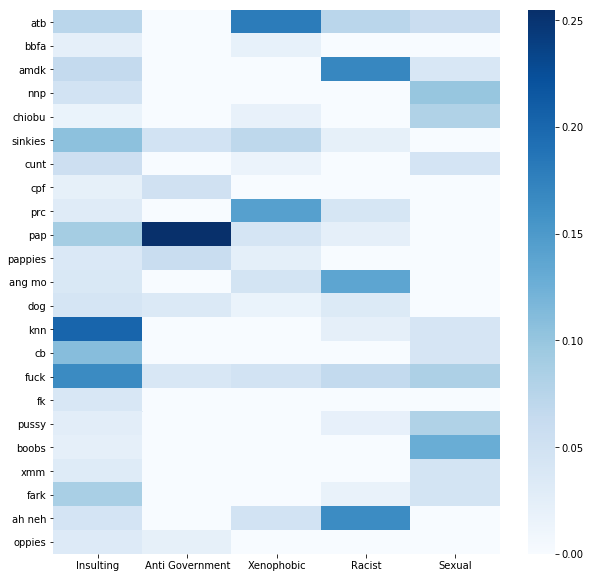

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))
sns.heatmap(PointBiserialCoefficientMatrix, cmap="Blues")

###The attempt to evaluate a new comment.

###New comments go through the same appendment of all 23 features, counting the number of word in the new comment.

###The output is a 1 x 23 matrix.

In [0]:
## Input your new string.
new_comment = str('The pap government has been doing nothing but fucking my nnp chiobu balls in the cunt face. Wish i could suck his balls and cb so that i can cb cb cb cb')  

empty_df = pd.DataFrame(columns=['Comments'])
empty_df.at[0,'Comments'] = new_comment
empty_df['atb'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('atb'))
empty_df['bbfa'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('bbfa'))
empty_df['amdk'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('amdk'))
empty_df['nnp'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('nnp'))
empty_df['chiobu'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('chiobu'))
empty_df['sinkies'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('sinkies'))
empty_df['cunt'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('cunt'))
empty_df['cpf'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('cpf'))
empty_df['prc'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('prc'))
empty_df['pap'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('pap'))
empty_df['pappies'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('pappies'))
empty_df['ang mo'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('ang mo'))
empty_df['dog'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=dog)', comment.lower())))
empty_df['knn'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=knn)', comment.lower())))
empty_df['cb'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=cb)', comment.lower())))
empty_df['fuck'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fuck)', comment.lower())))
empty_df['fk'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fk)', comment.lower())))
empty_df['pussy'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=pussy)', comment.lower())))
empty_df['boobs'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=boobs)', comment.lower())))
empty_df['xmm'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=xmm)', comment.lower())))
empty_df['fark'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fark)', comment.lower())))
empty_df['ah neh'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=ah neh)', comment.lower())))
empty_df['oppies'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=oppies)', comment.lower())))
empty_df

,Comments,atb,bbfa,amdk,nnp,chiobu,sinkies,cunt,cpf,prc,...,knn,cb,fuck,fk,pussy,boobs,xmm,fark,ah neh,oppies
0,The pap government has been doing nothing but ...,0,0,0,1,1,0,1,0,0,...,0,5,1,0,0,0,0,0,0,0


###Dropping the 'Comments' column...





In [0]:
empty_df = empty_df.drop(['Comments'],axis=1)

KeyError: ignored

In [0]:
empty_df

,atb,bbfa,amdk,nnp,chiobu,sinkies,cunt,cpf,prc,pap,...,knn,cb,fuck,fk,pussy,boobs,xmm,fark,ah neh,oppies
0,0,0,0,1,1,0,1,0,0,1,...,0,5,1,0,0,0,0,0,0,0


###To evaluate whether or not to ban the comment, we put it through matrix multiplication.

###Mutliplying the new comment matrix ( 1 x 23 ) against the Point Biserial Correlation Matrix ( 23 x 5) to output a 'score' matrix of (1 x 5).

###However, these values are not a scale. Rather, they are a relative score to each other.

###We can say that for this particular comment, it is more Insulting than it is Xenophobic.

###But, we cannot deduce that it is definitely Insulting just by looking at this score.

In [0]:
scores = empty_df.dot(PointBiserialCoefficientMatrix)
scores


,Insulting,Anti Government,Xenophobic,Racist,Sexual
0,0.927552,0.295106,0.1274,0.09041,0.525394


### To do out-of-sample accuracy test, writing a new function.

In [0]:
def Insulting_Evaluation(test_comment, PBCM):
  new_comment = test_comment
  empty_df = pd.DataFrame(columns=['Comments'])
  empty_df.at[0,'Comments'] = new_comment
  empty_df['atb'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('atb'))
  empty_df['bbfa'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('bbfa'))
  empty_df['amdk'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('amdk'))
  empty_df['nnp'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('nnp'))
  empty_df['chiobu'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('chiobu'))
  empty_df['sinkies'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('sinkies'))
  empty_df['cunt'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('cunt'))
  empty_df['cpf'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('cpf'))
  empty_df['prc'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('prc'))
  empty_df['pap'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('pap'))
  empty_df['pappies'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('pappies'))
  empty_df['ang mo'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('ang mo'))
  empty_df['dog'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=dog)', comment.lower())))
  empty_df['knn'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=knn)', comment.lower())))
  empty_df['cb'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=cb)', comment.lower())))
  empty_df['fuck'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fuck)', comment.lower())))
  empty_df['fk'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fk)', comment.lower())))
  empty_df['pussy'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=pussy)', comment.lower())))
  empty_df['boobs'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=boobs)', comment.lower())))
  empty_df['xmm'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=xmm)', comment.lower())))
  empty_df['fark'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fark)', comment.lower())))
  empty_df['ah neh'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=ah neh)', comment.lower())))
  empty_df['oppies'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=oppies)', comment.lower())))
  empty_df = empty_df.drop(['Comments'],axis=1)
  scores = np.matmul(empty_df, PBCM)
  if scores[0][0] > 0: return 1 
  else: return 0
  
def AG_Evaluation(test_comment, PBCM):
  new_comment = test_comment
  empty_df = pd.DataFrame(columns=['Comments'])
  empty_df.at[0,'Comments'] = new_comment
  empty_df['atb'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('atb'))
  empty_df['bbfa'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('bbfa'))
  empty_df['amdk'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('amdk'))
  empty_df['nnp'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('nnp'))
  empty_df['chiobu'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('chiobu'))
  empty_df['sinkies'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('sinkies'))
  empty_df['cunt'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('cunt'))
  empty_df['cpf'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('cpf'))
  empty_df['prc'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('prc'))
  empty_df['pap'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('pap'))
  empty_df['pappies'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('pappies'))
  empty_df['ang mo'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('ang mo'))
  empty_df['dog'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=dog)', comment.lower())))
  empty_df['knn'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=knn)', comment.lower())))
  empty_df['cb'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=cb)', comment.lower())))
  empty_df['fuck'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fuck)', comment.lower())))
  empty_df['fk'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fk)', comment.lower())))
  empty_df['pussy'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=pussy)', comment.lower())))
  empty_df['boobs'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=boobs)', comment.lower())))
  empty_df['xmm'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=xmm)', comment.lower())))
  empty_df['fark'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fark)', comment.lower())))
  empty_df['ah neh'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=ah neh)', comment.lower())))
  empty_df['oppies'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=oppies)', comment.lower())))
  empty_df = empty_df.drop(['Comments'],axis=1)
  scores = np.matmul(empty_df, PBCM)
  if scores[0][1] > 0: return 1 
  else: return 0

def Xenophobic_Evaluation(test_comment, PBCM):
  new_comment = test_comment
  empty_df = pd.DataFrame(columns=['Comments'])
  empty_df.at[0,'Comments'] = new_comment
  empty_df['atb'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('atb'))
  empty_df['bbfa'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('bbfa'))
  empty_df['amdk'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('amdk'))
  empty_df['nnp'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('nnp'))
  empty_df['chiobu'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('chiobu'))
  empty_df['sinkies'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('sinkies'))
  empty_df['cunt'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('cunt'))
  empty_df['cpf'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('cpf'))
  empty_df['prc'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('prc'))
  empty_df['pap'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('pap'))
  empty_df['pappies'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('pappies'))
  empty_df['ang mo'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('ang mo'))
  empty_df['dog'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=dog)', comment.lower())))
  empty_df['knn'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=knn)', comment.lower())))
  empty_df['cb'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=cb)', comment.lower())))
  empty_df['fuck'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fuck)', comment.lower())))
  empty_df['fk'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fk)', comment.lower())))
  empty_df['pussy'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=pussy)', comment.lower())))
  empty_df['boobs'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=boobs)', comment.lower())))
  empty_df['xmm'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=xmm)', comment.lower())))
  empty_df['fark'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fark)', comment.lower())))
  empty_df['ah neh'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=ah neh)', comment.lower())))
  empty_df['oppies'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=oppies)', comment.lower())))
  empty_df = empty_df.drop(['Comments'],axis=1)
  scores = np.matmul(empty_df, PBCM)
  if scores[0][2] > 0: return 1 
  else: return 0
  
def Racist_Evaluation(test_comment, PBCM):
  new_comment = test_comment
  empty_df = pd.DataFrame(columns=['Comments'])
  empty_df.at[0,'Comments'] = new_comment
  empty_df['atb'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('atb'))
  empty_df['bbfa'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('bbfa'))
  empty_df['amdk'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('amdk'))
  empty_df['nnp'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('nnp'))
  empty_df['chiobu'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('chiobu'))
  empty_df['sinkies'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('sinkies'))
  empty_df['cunt'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('cunt'))
  empty_df['cpf'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('cpf'))
  empty_df['prc'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('prc'))
  empty_df['pap'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('pap'))
  empty_df['pappies'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('pappies'))
  empty_df['ang mo'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('ang mo'))
  empty_df['dog'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=dog)', comment.lower())))
  empty_df['knn'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=knn)', comment.lower())))
  empty_df['cb'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=cb)', comment.lower())))
  empty_df['fuck'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fuck)', comment.lower())))
  empty_df['fk'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fk)', comment.lower())))
  empty_df['pussy'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=pussy)', comment.lower())))
  empty_df['boobs'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=boobs)', comment.lower())))
  empty_df['xmm'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=xmm)', comment.lower())))
  empty_df['fark'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fark)', comment.lower())))
  empty_df['ah neh'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=ah neh)', comment.lower())))
  empty_df['oppies'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=oppies)', comment.lower())))
  empty_df = empty_df.drop(['Comments'],axis=1)
  scores = np.matmul(empty_df, PBCM)
  if scores[0][3] > 0: return 1 
  else: return 0
  
def Sexual_Evaluation(test_comment, PBCM):
  new_comment = test_comment
  empty_df = pd.DataFrame(columns=['Comments'])
  empty_df.at[0,'Comments'] = new_comment
  empty_df['atb'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('atb'))
  empty_df['bbfa'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('bbfa'))
  empty_df['amdk'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('amdk'))
  empty_df['nnp'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('nnp'))
  empty_df['chiobu'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('chiobu'))
  empty_df['sinkies'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('sinkies'))
  empty_df['cunt'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('cunt'))
  empty_df['cpf'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('cpf'))
  empty_df['prc'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('prc'))
  empty_df['pap'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('pap'))
  empty_df['pappies'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('pappies'))
  empty_df['ang mo'] = empty_df['Comments'].apply(lambda comment: comment.lower().count('ang mo'))
  empty_df['dog'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=dog)', comment.lower())))
  empty_df['knn'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=knn)', comment.lower())))
  empty_df['cb'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=cb)', comment.lower())))
  empty_df['fuck'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fuck)', comment.lower())))
  empty_df['fk'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fk)', comment.lower())))
  empty_df['pussy'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=pussy)', comment.lower())))
  empty_df['boobs'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=boobs)', comment.lower())))
  empty_df['xmm'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=xmm)', comment.lower())))
  empty_df['fark'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=fark)', comment.lower())))
  empty_df['ah neh'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=ah neh)', comment.lower())))
  empty_df['oppies'] = empty_df['Comments'].apply(lambda comment: len(re.findall('(?=oppies)', comment.lower())))
  empty_df = empty_df.drop(['Comments'],axis=1)
  scores = np.matmul(empty_df, PBCM)
  if scores[0][4] > 0: return 1 
  else: return 0

###f(x) is the function to test if we have correctly predicted a new comment. If all labels are correctly matched, then the function should return 1, otherwise 0.

In [0]:
def f(x):
    if Insulting_Evaluation(x['Comments'], PBCM) == x['Insulting'] and AG_Evaluation(x['Comments'], PBCM) == x['Anti_Government']  and Xenophobic_Evaluation(x['Comments'], PBCM) == x['Xenophobic'] and Racist_Evaluation(x['Comments'], PBCM) == x['Racist'] and Sexual_Evaluation(x['Comments'], PBCM) == x['Sexual']: return 1
    else: return 0

###Split the training data set into 10 splits, shuffling the splits each time.

###printing the length of the train set, and the length of the test set to confirm that they are split correctly.

In [0]:
df2 = pd.read_csv('train.csv') #change the filename here
df2[['Comments']] = df2[['Comments']].astype(str)
kf = KFold(n_splits=10, random_state=42, shuffle=True) # Define the split - into 10 folds 
kf.get_n_splits(df2) # returns the number of splitting iterations in the cross-validator

for train_index, test_index in kf.split(df2):
  print(len(train_index))
  print(len(test_index))

NameError: ignored

CV scores for each iteration will be appended into the CV_scores array.

For each train and test split, we go through the entire computaion for each comment.

If comment was correctly classified, we will return 1.

In [0]:
CV_scores = []
i = 0
for train_index, test_index in kf.split(df2):
  train=df2.iloc[train_index]
  test=df2.iloc[test_index]
  PointBiserialCoefficientMatrix = train.iloc[0:0,1:5]
  PValuesMatrixStored = train.iloc[0:0, 1:5]
  train['atb'] = train['Comments'].apply(lambda comment: comment.lower().count('atb'))
  train['bbfa'] = train['Comments'].apply(lambda comment: comment.lower().count('bbfa'))
  train['amdk'] = train['Comments'].apply(lambda comment: comment.lower().count('amdk'))
  train['nnp'] = train['Comments'].apply(lambda comment: comment.lower().count('nnp'))
  train['chiobu'] = train['Comments'].apply(lambda comment: comment.lower().count('chiobu'))
  train['sinkies'] = train['Comments'].apply(lambda comment: comment.lower().count('sinkies'))
  train['cunt'] = train['Comments'].apply(lambda comment: comment.lower().count('cunt'))
  train['cpf'] = train['Comments'].apply(lambda comment: comment.lower().count('cpf'))
  train['prc'] = train['Comments'].apply(lambda comment: comment.lower().count('prc'))
  train['pap'] = train['Comments'].apply(lambda comment: comment.lower().count('pap'))
  train['pappies'] = train['Comments'].apply(lambda comment: comment.lower().count('pappies'))
  train['ang mo'] = train['Comments'].apply(lambda comment: comment.lower().count('ang mo'))
  train['dog'] = train['Comments'].apply(lambda comment: len(re.findall('(?=dog)', comment.lower())))
  train['knn'] = train['Comments'].apply(lambda comment: len(re.findall('(?=knn)', comment.lower())))
  train['cb'] = train['Comments'].apply(lambda comment: len(re.findall('(?=cb)', comment.lower())))
  train['fuck'] = train['Comments'].apply(lambda comment: len(re.findall('(?=fuck)', comment.lower())))
  train['fk'] = train['Comments'].apply(lambda comment: len(re.findall('(?=fk)', comment.lower())))
  train['pussy'] = train['Comments'].apply(lambda comment: len(re.findall('(?=pussy)', comment.lower())))
  train['boobs'] = train['Comments'].apply(lambda comment: len(re.findall('(?=boobs)', comment.lower())))
  train['xmm'] = train['Comments'].apply(lambda comment: len(re.findall('(?=xmm)', comment.lower())))
  train['fark'] = train['Comments'].apply(lambda comment: len(re.findall('(?=fark)', comment.lower())))
  train['ah neh'] = train['Comments'].apply(lambda comment: len(re.findall('(?=ah neh)', comment.lower())))
  train['oppies'] = train['Comments'].apply(lambda comment: len(re.findall('(?=oppies)', comment.lower())))
  features = ('atb', 'bbfa', 'amdk', 'nnp', 'chiobu', 'sinkies', 'cunt', 'cpf', 'prc', 'pap','pappies','ang mo','dog','knn','cb','fuck','fk','pussy','boobs','xmm','fark','ah neh', 'oppies')
  columns = ('Insulting', 'Anti Government', 'Xenophobic', 'Racist', 'Sexual')

  for c in columns:
    for f in features: 
      a,r = stats.pointbiserialr(train[c], train[f])
      if (r < 0.05 and a > 0): 
        PointBiserialCoefficientMatrix.loc[f,c] = a 
      else:
        PointBiserialCoefficientMatrix.loc[f,c] = 0 
  print(PointBiserialCoefficientMatrix)
        
  def f(x):
    if Insulting_Evaluation(x['Comments'], PointBiserialCoefficientMatrix) == x['Insulting'] and AG_Evaluation(x['Comments'], PointBiserialCoefficientMatrix) == x['Anti Government']  and Xenophobic_Evaluation(x['Comments'], PointBiserialCoefficientMatrix) == x['Xenophobic'] and Racist_Evaluation(x['Comments'], PointBiserialCoefficientMatrix) == x['Racist'] and Sexual_Evaluation(x['Comments'], PointBiserialCoefficientMatrix) == x['Sexual']: return 1
    else: return 0
  
  print(i)
  test['correct_evaluation'] = test.apply(f, axis=1)
  CV_scores.append(test.correct_evaluation.sum()/len(train_index))
  i = i+1
  
 
 
   

Determine the average CV score based purely on accuracy for this model.

In [0]:
print(np.mean(CV_scores) * 100)